Estimation of Rate of Penetration depending on MWD logs . 

In the drilling industry, the rate of penetration (ROP), also known as penetration rate or drill rate, is the speed at which a drill bit breaks the rock under it to deepen the borehole. It is normally measured in feet per minute or meters per hour, but sometimes it is expressed in minutes per foot.

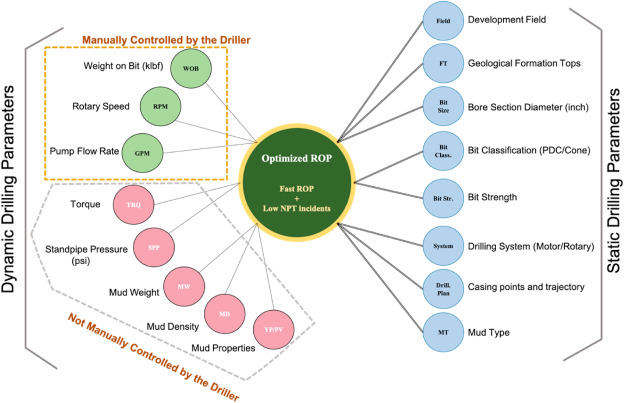

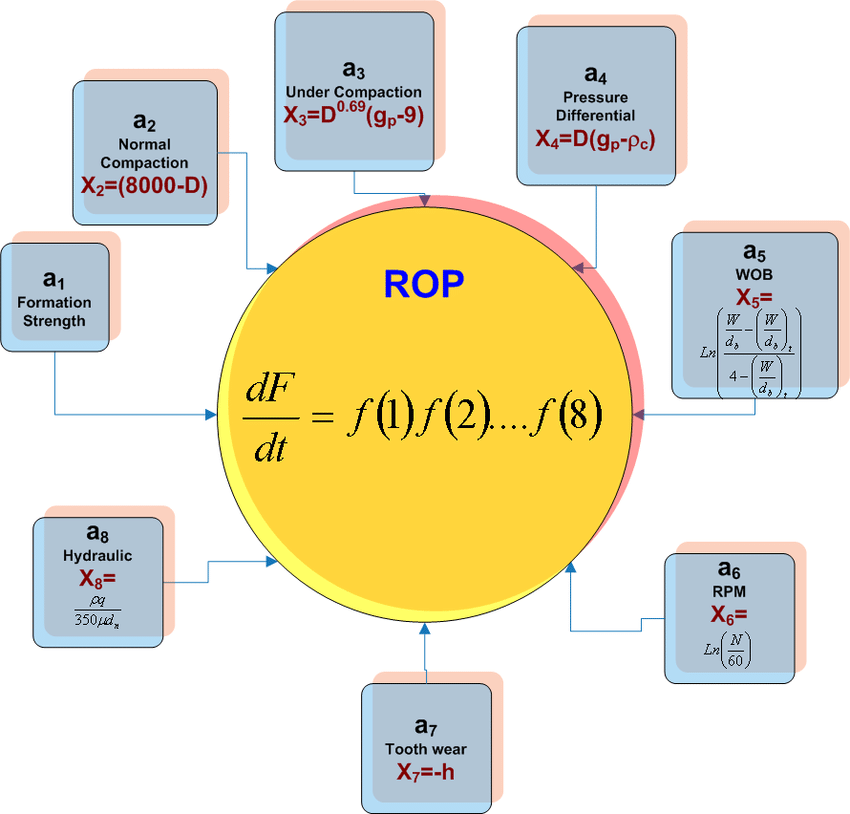

In [2]:
#Import Libraries
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('D:/python/my work/hoss/Chapter-5/Chapter 5/Rate of Penetration (ROP) Example/Chapter5_ROP_DataSet.csv')
data

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit,Rate Of Penetration
0,6524,117.5,29,6.702,15.6,370.6,134.12,34.29
1,6525,116.9,29,4.345,10.2,202.9,136.47,34.04
2,6526,112.5,29,5.151,10.2,359.0,134.12,34.17
3,6527,113.1,29,5.016,9.4,332.6,138.82,34.48
4,6528,110.8,29,5.510,10.6,343.7,141.18,34.31
...,...,...,...,...,...,...,...,...
7929,14450,118.3,100,17.131,24.2,649.5,225.88,198.99
7930,14451,118.6,100,16.165,23.5,648.3,223.53,191.73
7931,14452,118.3,100,16.528,23.8,646.6,223.53,198.56
7932,14453,118.0,100,15.854,23.8,662.9,225.88,198.56


importing the data 


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hole Depth,7934.0,10487.930804,2289.973781,6524.000,8500.250,10487.500,12469.750,14454.00
Hook Load,7934.0,129.672107,7.724432,107.200,123.800,129.500,134.400,156.40
Rotary RPM,7934.0,65.961054,24.280720,9.000,49.000,70.000,90.000,101.00
Rotary Torque,7934.0,11.459822,3.386672,2.701,9.096,11.373,14.198,20.05
Weight on Bit,7934.0,19.826758,5.611785,0.000,16.300,20.400,23.900,39.40
Differential Pressure,7934.0,520.255067,142.477894,2.900,429.350,565.900,627.700,783.30
Gamma at Bit,7934.0,211.783237,81.536917,54.120,148.240,204.710,235.290,600.00
Rate Of Penetration,7934.0,143.107280,55.738087,1.610,100.160,161.160,185.240,259.29


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7934 entries, 0 to 7933
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hole Depth             7934 non-null   int64  
 1   Hook Load              7934 non-null   float64
 2   Rotary RPM             7934 non-null   int64  
 3   Rotary Torque          7934 non-null   float64
 4   Weight on Bit          7934 non-null   float64
 5   Differential Pressure  7934 non-null   float64
 6   Gamma at Bit           7934 non-null   float64
 7   Rate Of Penetration    7934 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 496.0 KB


there is no nulls 

to show the relation between the features , we can use Correlation matrix 

<AxesSubplot:>

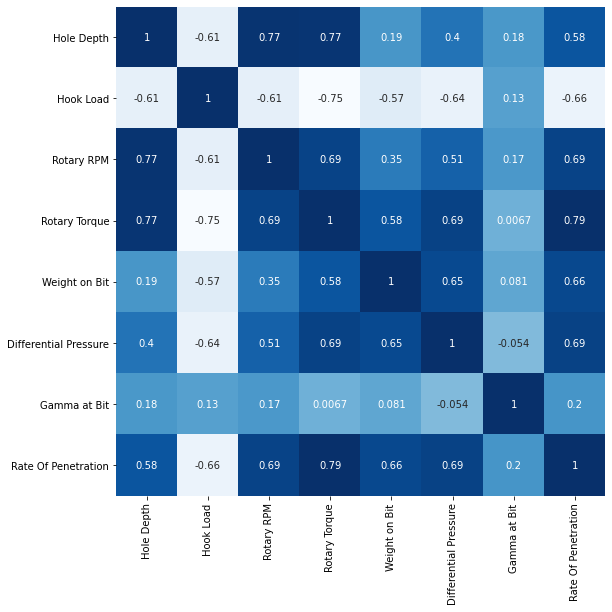

In [6]:
import seaborn as sns 

#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="Blues",annot=True,cbar=False)

to visualize the relations , use Pair plot 

D:\python\New folder\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


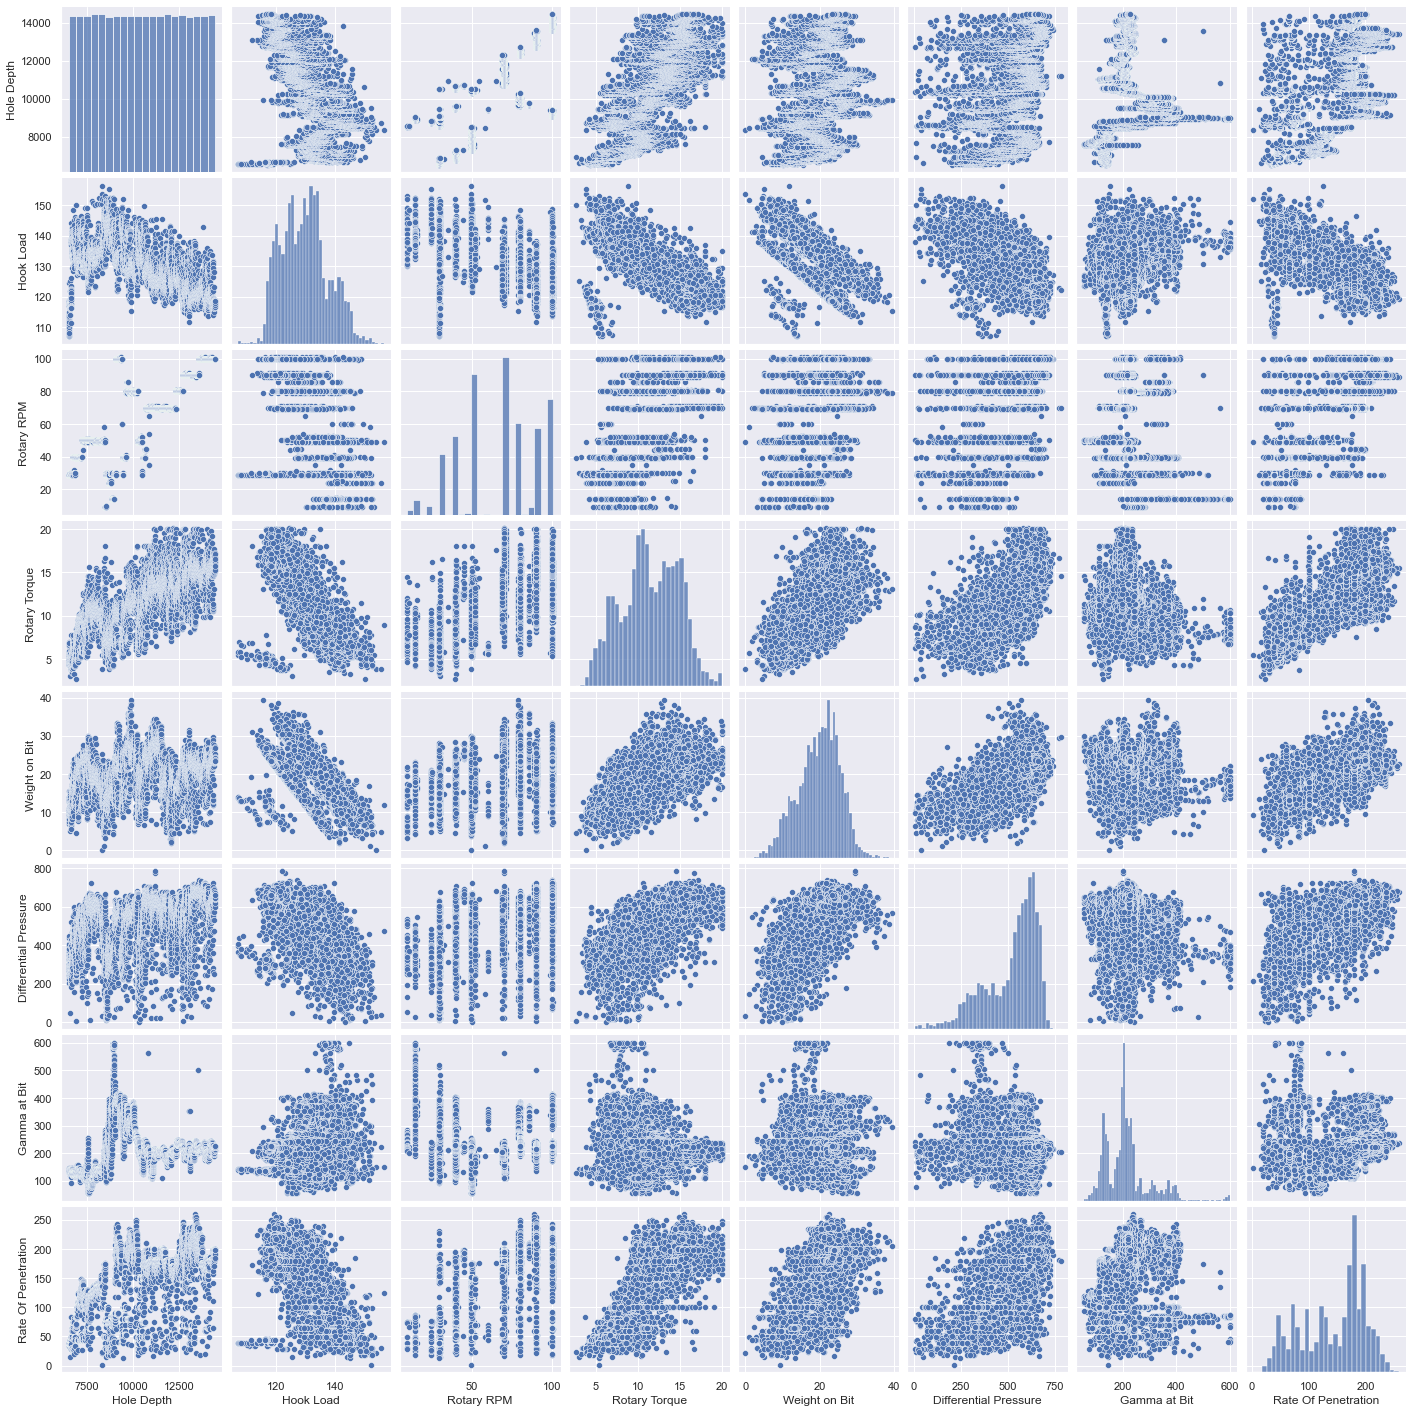

In [7]:
sns.set()
sns.pairplot(data, size = 2.5)
plt.show()

for knowing the strong direct and strong inverse relation with Rate of Penetration 

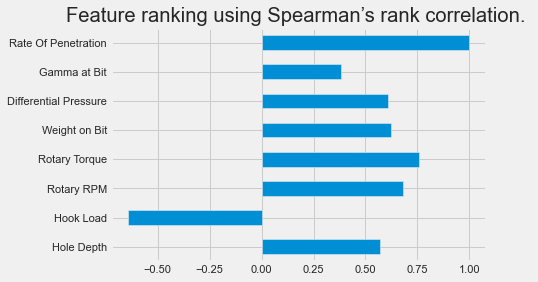

In [8]:
plt.style.use('fivethirtyeight')
from scipy import stats
rho, pval=stats.spearmanr(data)
corr=pd.Series(rho[:8,7], index=data.columns)
corr.plot(kind='barh') 
plt.title("Feature ranking using Spearman’s rank correlation. ")
plt.show()

### from the feature ranking ,pair plot and corelation mtrix , you can find that:
-Weight on Bit ,Differential Pressure ,Rotary Torque feature has strong direct relation with ROP
-Hook load  feature has indirect relation with ROP


make y = ROP 

In [9]:
data.columns
data.shape

(7934, 8)

In [10]:

y=data.iloc[:,-1].values
y

array([ 34.29,  34.04,  34.17, ..., 198.56, 198.56, 185.07])

In [11]:
X=data.iloc[:,:-1]
#X.shape
X

,Hole Depth,Hook Load,Rotary RPM,Rotary Torque,Weight on Bit,Differential Pressure,Gamma at Bit
0,6524,117.5,29,6.702,15.6,370.6,134.12
1,6525,116.9,29,4.345,10.2,202.9,136.47
2,6526,112.5,29,5.151,10.2,359.0,134.12
3,6527,113.1,29,5.016,9.4,332.6,138.82
4,6528,110.8,29,5.510,10.6,343.7,141.18
...,...,...,...,...,...,...,...
7929,14450,118.3,100,17.131,24.2,649.5,225.88
7930,14451,118.6,100,16.165,23.5,648.3,223.53
7931,14452,118.3,100,16.528,23.8,646.6,223.53
7932,14453,118.0,100,15.854,23.8,662.9,225.88


Using partial dependence to show the most important factors to ROP

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.preprocessing import MinMaxScaler

In [13]:
X.columns

Index(['Hole Depth', 'Hook Load', 'Rotary RPM', 'Rotary Torque',
       'Weight on Bit', 'Differential Pressure', 'Gamma at Bit'],
      dtype='object')

Test R2 score: 0.77


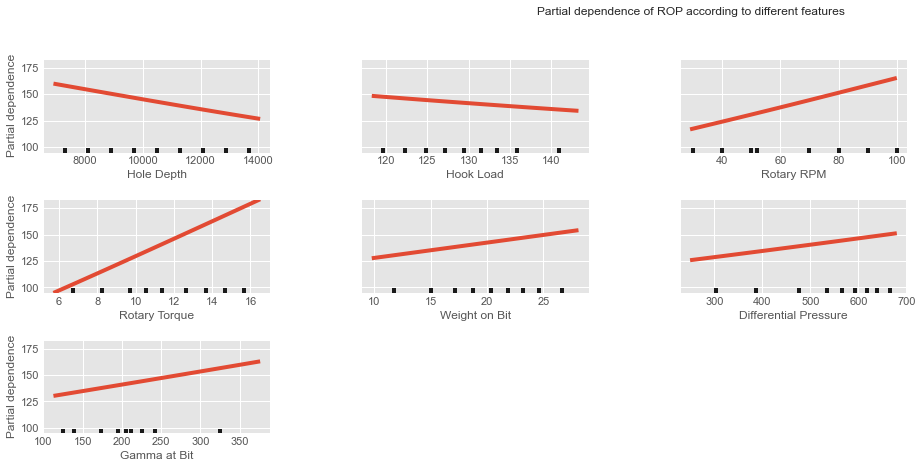

In [14]:
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size
=0.25)
model=make_pipeline(MinMaxScaler(), MLPRegressor(hidden_layer_sizes=(25,25),
                                 learning_rate_init=0.01,
                                 early_stopping=True,max_iter=1000))
model.fit(X_train, y_train)
print("Test R2 score: {:.2f}".format(model.score(X_test, y_test)))
features=['Hole Depth', 'Hook Load', 'Rotary RPM', 'Rotary Torque',
       'Weight on Bit', 'Differential Pressure', 'Gamma at Bit']

plot_partial_dependence(model,X, features,
                        n_jobs=3, grid_resolution=20)
fig = plt.gcf()

fig.suptitle('Partial dependence of ROP according to different features')

 
fig.subplots_adjust(hspace=.5,wspace=.4 ,top=.8,bottom=-.5,right=1,left=-1)


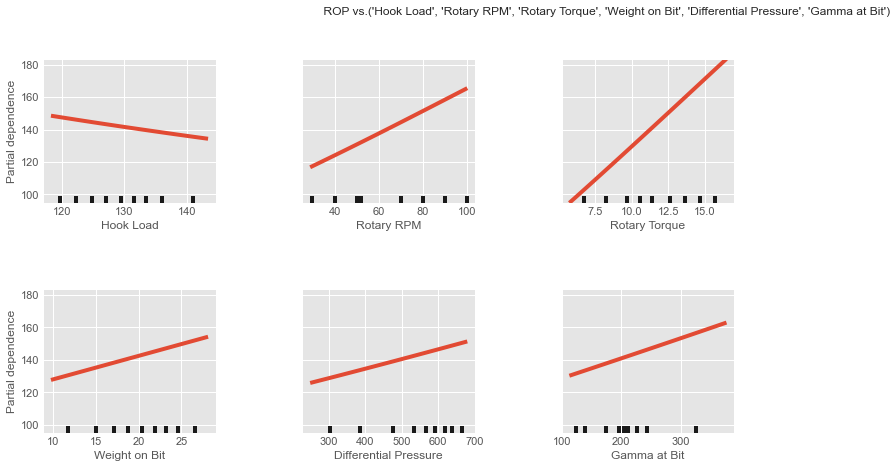

In [15]:
imp_features=[('Hook Load', 'Rotary RPM', 'Rotary Torque','Weight on Bit', 'Differential Pressure', 'Gamma at Bit')]

for item in imp_features:
    plot_partial_dependence(model,X, item, n_jobs=3, 
    grid_resolution=20)
    fig=plt.gcf()
    fig.suptitle(f' ROP vs.{item}')
    fig.subplots_adjust(hspace=.6,wspace=.5,top=.8,bottom=-.5,right=.8,left=-.8)

from the partial dependance plot we can see that Rotary torue ,Rotary RPM ,Hook load ,DP ,WOB
are important features for predicting ROP

Text(0.5, 0.98, 'ROP  vs Rotary Torue and Hook Load')

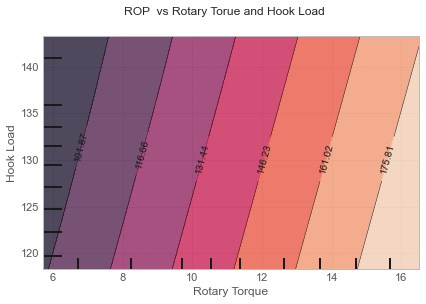

In [16]:
plt.style.use('bmh')

imp_features=[('Rotary Torque','Hook Load')]
plot_partial_dependence(model,X,imp_features, n_jobs=3, 
grid_resolution=20)
fig=plt.gcf()
fig.suptitle('ROP  vs Rotary Torue and Hook Load')

Text(0.5, 0.98, 'ROP  vs Rotary Torue and Weight on Bit')

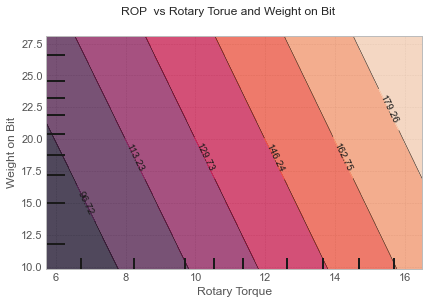

In [17]:
plt.style.use('bmh')

imp_features=[('Rotary Torque','Weight on Bit')]
plot_partial_dependence(model,X,imp_features, n_jobs=3, 
grid_resolution=20)
fig=plt.gcf()
fig.suptitle('ROP  vs Rotary Torue and Weight on Bit')

<ipython-input-18-fca500d8663f>:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  surf=ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.


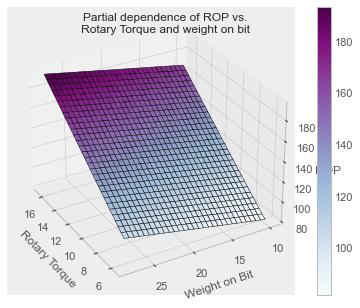

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
features1=('Rotary Torque','Weight on Bit')
pdp, axes=partial_dependence(model, X_train, features=features1,
grid_resolution=30)

XX, YY=np.meshgrid(axes[0], axes[1])
Z=pdp[0].T

ax=Axes3D(fig)
surf=ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.
BuPu, edgecolor='k0')
ax.set_xlabel(features1[0])
ax.set_ylabel(features1[1])
ax.set_zlabel('ROP')
ax.view_init(elev=30, azim=150)
plt.colorbar(surf)
plt.suptitle('Partial dependence of ROP vs.\n' 'Rotary Torque and weight on bit')

plt.subplots_adjust(top=1)
plt.show()

In [19]:

#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
print('X \n' , X[:10])
print('y \n' , y[:10])


X 
 [[-1.73110307 -1.57589241 -1.5223347  -1.40495509 -0.75324064 -1.05044014
  -0.95255174]
 [-1.73066635 -1.65357292 -1.5223347  -2.10096241 -1.71556193 -2.22753902
  -0.92372862]
 [-1.73022964 -2.22322996 -1.5223347  -1.86295566 -1.71556193 -1.13186141
  -0.95255174]
 [-1.72979293 -2.14554945 -1.5223347  -1.90282032 -1.85812805 -1.31716499
  -0.8949055 ]
 [-1.72935621 -2.44332472 -1.5223347  -1.75694522 -1.64427887 -1.23925326
  -0.86595973]
 [-1.7289195  -2.50805847 -1.5223347  -1.91935677 -1.55517505 -0.96901887
  -0.92372862]
 [-1.72848278 -2.55984548 -1.5223347  -1.72269114 -1.18093899 -1.08062216
  -0.86595973]
 [-1.72804607 -2.896461   -1.5223347  -1.69818176 -1.0740144  -1.10167939
  -0.86595973]
 [-1.72760936 -2.90940775 -1.5223347  -1.70704058 -1.05619364 -0.86022321
  -0.86595973]
 [-1.72717264 -2.90940775 -1.5223347  -1.76668991 -1.10965593 -1.09185268
  -0.86595973]]
y 
 [34.29 34.04 34.17 34.48 34.31 34.86 39.2  39.12 39.16 39.21]


In [20]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)

In [21]:
#Applying Linear Regression Model 

LinearRegressionModel= LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
#print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
#print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
#print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

score_LRM =LinearRegressionModel.score(X_test, y_test)


#print(score_LRM)
#Calculating Prediction
y_pred = LinearRegressionModel.predict(X_test)
#print('Predicted Value for Linear Regression is : ' , y_pred[:10])
#Calculating Mean Absolute Error

MAEValue_LRM = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_LRM)


In [22]:
#Applying SGDRegressor Model 

'''
sklearn.linear_model.SGDRegressor(loss='squared_loss’, penalty=’l2’, alpha=0.0001,
                                  l1_ratio=0.15, fit_intercept=True, max_iter=None,
                                  tol=None, shuffle=True, verbose=0, epsilon=0.1,
                                  random_state=None, learning_rate='invscaling’,
                                  eta0=0.01, power_t=0.25, early_stopping=False,
                                  validation_fraction=0.1, n_iter_no_change=5,
                                  warm_start=False, average=False, n_iter=None)
'''

SGDRegressionModel = SGDRegressor(alpha=.0001,random_state=33,penalty='l2',max_iter=1000)
SGDRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('SGD Regression Train Score is : ' , SGDRegressionModel.score(X_train, y_train))
#print('SGD Regression Test Score is : ' , SGDRegressionModel.score(X_test, y_test))
#print('SGD Regression Coef is : ' , SGDRegressionModel.coef_)
#print('SGD Regression intercept is : ' , SGDRegressionModel.intercept_)
#print('----------------------------------------------------')

score_SGD=SGDRegressionModel.score(X_test, y_test)
#Calculating Prediction
y_pred = SGDRegressionModel.predict(X_test)
#print('Predicted Value for SGD Regression is : ' , y_pred[:10])


#Calculating Mean Absolute Error

MAEValue_SGD = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_LRM)

In [23]:
#Applying Lasso Regression Model 

'''
sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=
                           False, copy_X=True, max_iter=1000, tol=0.0001,
                           warm_start=False, positive=False, random_state=None,selection='cyclic')
'''

LassoRegressionModel = Lasso(alpha=.0001,random_state=33,normalize=True)
LassoRegressionModel.fit(X_train, y_train)

#Calculating Details
#print('Lasso Regression Train Score is : ' , LassoRegressionModel.score(X_train, y_train))
#print('Lasso Regression Test Score is : ' , LassoRegressionModel.score(X_test, y_test))
#print('Lasso Regression Coef is : ' , LassoRegressionModel.coef_)
#print('Lasso Regression intercept is : ' , LassoRegressionModel.intercept_)
#print('----------------------------------------------------')
score_LAS=LassoRegressionModel.score(X_test, y_test)
#Calculating Prediction
y_pred = LassoRegressionModel.predict(X_test)
#print('Predicted Value for Lasso Regression is : ' , y_pred[:10])
#Calculating Mean Absolute Error

MAEValue_LAS = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_LAS)

In [25]:
#Applying Random Forest Regressor Model 

'''
sklearn.ensemble.RandomForestRegressor(n_estimators='warn', criterion=’mse’, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                       max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                       min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                       random_state=None, verbose=0,warm_start=False)
'''
#max_features : {"auto", "sqrt", "log2"}
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=15, random_state=33,max_features="log2")
RandomForestRegressorModel.fit(X_train, y_train)

#Calculating Details
#print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
#print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
#print('----------------------------------------------------')
score_RFR=RandomForestRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = RandomForestRegressorModel.predict(X_test)
#print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

#Calculating Mean Absolute Error

MAEValue_RFR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_RFR)

Random Forest Regressor Test Score is :  0.9269077637097396


In [62]:
#Applying SVR Model 

'''
sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, tol=0.001,
                C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False,max_iter=-1)
'''

SVRModel = SVR(C = 10 ,epsilon=0.1,kernel = 'rbf') # it also can be : linear, poly, rbf, sigmoid, precomputed
SVRModel.fit(X_train, y_train)

#Calculating Details
#print('SVRModel Train Score is : ' , SVRModel.score(X_train, y_train))
#print('SVRModel Test Score is : ' , SVRModel.score(X_test, y_test))

score_SVR= SVRModel.score(X_test, y_test)

#Calculating Prediction
y_pred = SVRModel.predict(X_test)
#print('Predicted Value for SVRModel is : ' , y_pred[:10])


#Calculating Mean Absolute Error

MAEValue_SVR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_SVR)


In [65]:
#Applying MLPRegressor Model 

'''
sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation='relu’, solver=’adam’,
                                    alpha=0.0001,batch_size='auto’, learning_rate=’constant’,
                                    learning_rate_init=0.001, power_t=0.5,max_iter=200, shuffle=True,
                                    random_state=None,tol=0.0001, verbose=False, warm_start=False,
                                    momentum=0.9, nesterovs_momentum=True,early_stopping=False,
                                    validation_fraction=0.1,beta_1=0.9, beta_2=0.999, epsilon=1E-08,
                                    n_iter_no_change=10)
'''

MLPRegressorModel = MLPRegressor(activation='tanh', # can be also identity , logistic , relu,tanh
                                 solver='lbfgs',  # can be also sgd , adam,lbfgs
                                 learning_rate='constant', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 alpha=10 ,hidden_layer_sizes=(100, 3),random_state=33,max_iter=1000)
MLPRegressorModel.fit(X_train, y_train)
#Calculating Details

#print('MLPRegressorModel Train Score is : ' , MLPRegressorModel.score(X_train, y_train))
#print('MLPRegressorModel Test Score is : ' , MLPRegressorModel.score(X_test, y_test))
#print('MLPRegressorModel loss is : ' , MLPRegressorModel.loss_)
#print('MLPRegressorModel No. of iterations is : ' , MLPRegressorModel.n_iter_)
#print('MLPRegressorModel No. of layers is : ' , MLPRegressorModel.n_layers_)
#print('MLPRegressorModel last activation is : ' , MLPRegressorModel.out_activation_)
#print('----------------------------------------------------')
score_MLP=MLPRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = MLPRegressorModel.predict(X_test)
#print('Predicted Value for MLPRegressorModel is : ' , y_pred[:10])
#Calculating Mean Absolute Error
MAEValue_MLP = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
#print('Mean Absolute Error Value is : ', MAEValue_MLP)

MLP=MLPRegressorModel.coefs_
print(MLP)

[array([[ 8.56277641e-01,  1.34463477e-01,  6.18204624e-02,
         3.15445435e-01,  5.50466038e-01,  3.48315720e-02,
        -2.41349343e-01, -2.78543329e-01, -5.02934874e-02,
         5.08742200e-01, -2.61505151e+00, -1.14610549e-01,
         9.99746059e-01,  3.58907663e+00, -1.46030206e-01,
        -1.92749839e+00, -2.76300527e-01, -9.39106244e-01,
         4.59223966e-01,  1.05419322e-01,  3.64185076e-01,
        -6.55685808e-02,  2.72291471e-01,  1.41662194e-01,
         1.02648207e-01, -4.96020166e-02,  8.47003024e-01,
        -2.75527517e-01, -6.65382491e-02, -3.08675609e-01,
        -3.23096942e-01, -1.98939654e-01,  1.68763425e+00,
        -1.19347883e-01, -5.01824738e-01, -2.02136948e-03,
        -1.49776636e+00,  1.17693359e-01, -2.82509207e-01,
        -4.39310795e-01, -3.43889719e-01,  5.47414105e-02,
        -2.28249502e-01, -2.86184353e-01,  1.84933706e+00,
         1.09912419e-01,  1.00751065e+00,  2.08740800e-02,
        -3.45929470e-01, -3.20881860e-02,  4.77871706e-

D:\python\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [31]:
models = pd.DataFrame({
'Model': ['Linear Regression Model ', 'SGD Model ', 'Lassio Model',
'Random Forest Regressor ', 'Linear SVR',
'MLP Model '],
'Score': [score_LRM, score_SGD, score_LAS,
score_RFR, score_SVR, score_MLP],
'Mean Absolute Error Value':[MAEValue_LRM,MAEValue_SGD,MAEValue_LAS,MAEValue_RFR,MAEValue_SVR,MAEValue_MLP]})
models.sort_values(by="Score", ascending=True)

models.set_index(["Model"], inplace = True, 
append = False, drop = True) 
models

,Score,Mean Absolute Error Value
Model,,
Linear Regression Model,0.751516,21.031184
SGD Model,0.751589,21.037472
Lassio Model,0.751501,21.032588
Random Forest Regressor,0.926908,8.396253
Linear SVR,0.873544,12.884145
MLP Model,0.897536,11.183145


from the above table , we can find that the best results come from Random Forest Regressor  

In [60]:
#Applying Random Forest Regressor Model 

'''
sklearn.ensemble.RandomForestRegressor(n_estimators='warn', criterion=’mse’, max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                       max_features=’auto’, max_leaf_nodes=None,min_impurity_decrease=0.0,
                                       min_impurity_split=None, bootstrap=True,oob_score=False, n_jobs=None,
                                       random_state=None, verbose=0,warm_start=False)
'''

RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=10, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

#Calculating Details
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
#print('----------------------------------------------------')
score_RFR=RandomForestRegressorModel.score(X_test, y_test)
#Calculating Prediction
y_pred = RandomForestRegressorModel.predict(X_test)
#print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

#Calculating Mean Absolute Error

MAEValue_RFR = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values

#print('Mean Absolute Error Value is : ', MAEValue_RFR)


Random Forest Regressor Train Score is :  0.9700253936679842
Random Forest Regressor Test Score is :  0.9160735782221573


to get the most important features 

In [33]:
features_names=data.columns[:-1]
features_names

Index(['Hole Depth', 'Hook Load', 'Rotary RPM', 'Rotary Torque',
       'Weight on Bit', 'Differential Pressure', 'Gamma at Bit'],
      dtype='object')

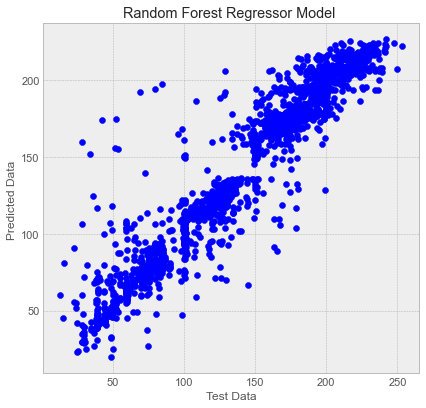

In [34]:
plt.style.use('bmh')
#plt.style.use('classic')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.scatter(y_test,y_pred,c="blue", label="All - Filtered")
ax.set(xlabel="Test Data", ylabel="Predicted Data ", title="Random Forest Regressor Model ")

plt.show()

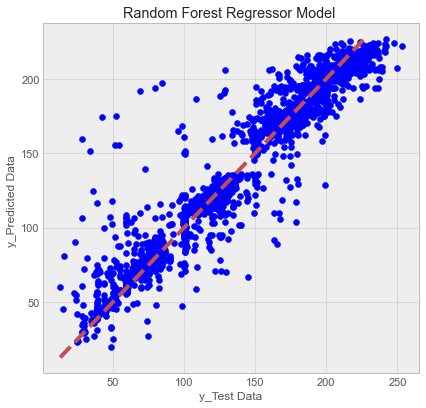

In [35]:
plt.style.use('bmh')
#plt.style.use('classic')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
plt.scatter(y_test,y_pred,c="blue", label="All - Filtered")
ax.set(xlabel="y_Test Data", ylabel="y_Predicted Data ", title="Random Forest Regressor Model ")
ax.plot([y_test.min(), y_pred.max()], [y_test.min(),
y_pred.max()], 'r--', lw=4)
plt.show()


,0
Rotary Torque,0.656522
Rotary RPM,0.133616
Weight on Bit,0.089206
Hole Depth,0.050632
Differential Pressure,0.030086
Gamma at Bit,0.028923
Hook Load,0.011015


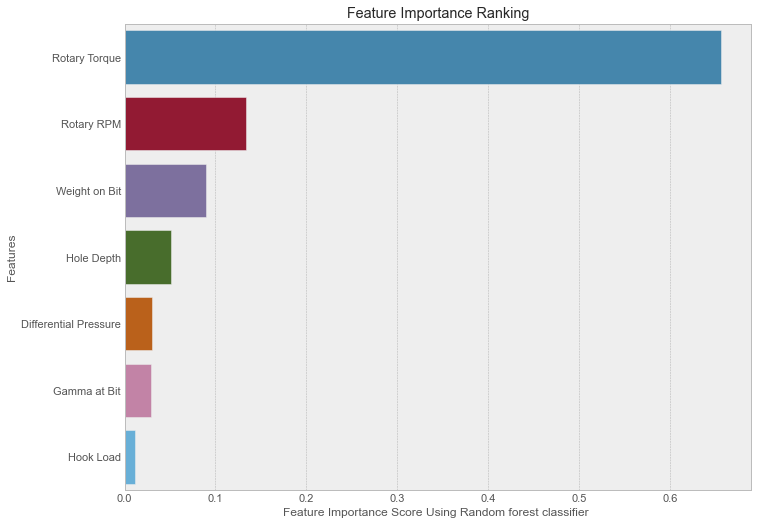

In [36]:
fi_RFR= RandomForestRegressorModel.feature_importances_

plt.figure(figsize=(10,8))
feature_imp =pd.Series(fi_RFR,index=features_names).sort_values(ascending=False)
feature_imp


sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Random forest classifier ')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

feature_imp=pd.DataFrame(feature_imp)
feature_imp

D:\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rotary Torque', ylabel='Hole Depth'>

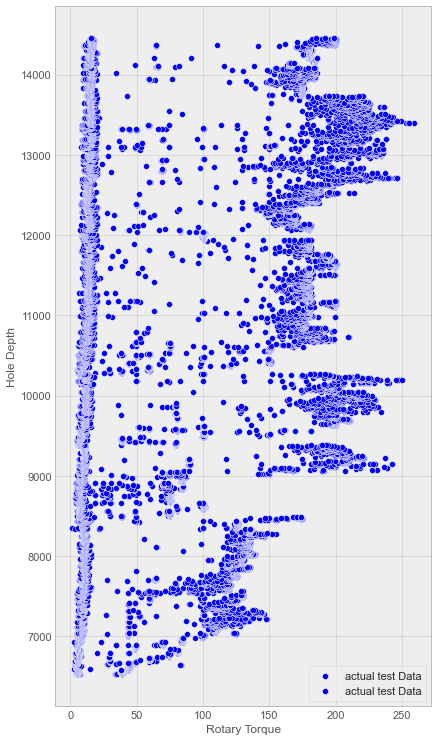

In [40]:
plt.figure(figsize=(6,12))
sns.scatterplot(y, data['Hole Depth'],
label='actual test Data', color='blue')
sns.scatterplot(data["Rotary Torque"], data['Hole Depth'],
label='actual test Data', color='blue')

In [41]:
data.columns

Index(['Hole Depth', 'Hook Load', 'Rotary RPM', 'Rotary Torque',
       'Weight on Bit', 'Differential Pressure', 'Gamma at Bit',
       'Rate Of Penetration'],
      dtype='object')

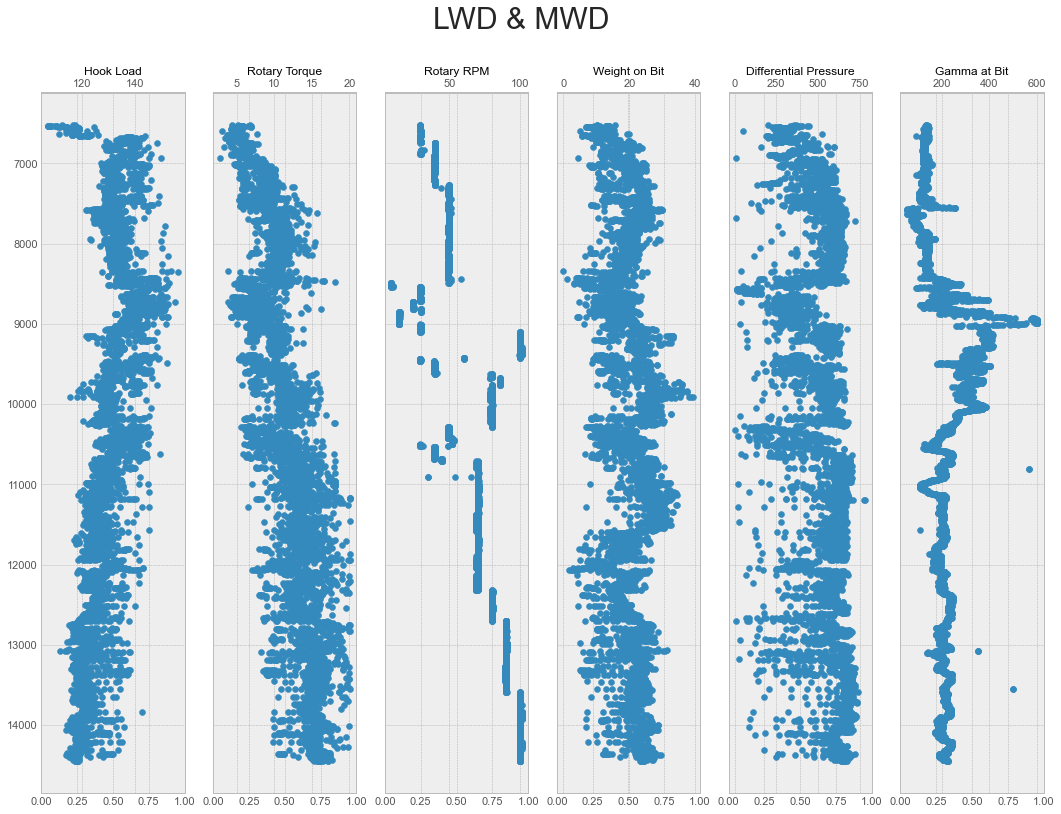

In [57]:
fig,ax= plt.subplots(nrows=1, ncols=6,figsize=(16,12),sharey=True)
fig.suptitle("LWD & MWD ", fontsize=30)

# Track #1:
 
ax1=ax[0].twiny()
#ax1.invert_yaxis()
ax1.scatter(data["Hook Load"],data["Hole Depth"])
ax1.set_xlabel('Hook Load',color='black')
ax1.tick_params(axis='x', color='black')
ax1.spines['top'].set_position(('outward',1))
                                     
 
ax1=ax[1].twiny()
#ax1.invert_yaxis()
ax1.scatter(data["Rotary Torque"],data["Hole Depth"])
ax1.set_xlabel('Rotary Torque',color='black')
ax1.tick_params(axis='x', color='black')
ax1.spines['top'].set_position(('outward',1)) 


 
ax1=ax[2].twiny()
#ax1.invert_yaxis()
ax1.scatter(data["Rotary RPM"],data["Hole Depth"])
ax1.set_xlabel('Rotary RPM',color='black')
ax1.tick_params(axis='x', color='black')
ax1.spines['top'].set_position(('outward',1))  

 
ax1=ax[3].twiny()
#ax1.invert_yaxis()
ax1.scatter(data["Weight on Bit"],data["Hole Depth"])
ax1.set_xlabel('Weight on Bit',color='black')
ax1.tick_params(axis='x', color='black')
ax1.spines['top'].set_position(('outward',1))  




ax1=ax[4].twiny()
#ax1.invert_yaxis()
ax1.scatter(data["Differential Pressure"],data["Hole Depth"])
ax1.set_xlabel('Differential Pressure',color='black')
ax1.tick_params(axis='x', color='black')
ax1.spines['top'].set_position(('outward',1))  

 
ax1=ax[5].twiny()
#ax1.invert_yaxis()
ax1.scatter(data["Gamma at Bit"],data["Hole Depth"])
ax1.set_xlabel('Gamma at Bit',color='black')
#ax1.tick_params(axis='x', color='black')
ax1.spines['top'].set_position(('outward',1))  

plt.gca().invert_yaxis()
                                     

D:\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\python\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rotary Torque', ylabel='Hole Depth'>

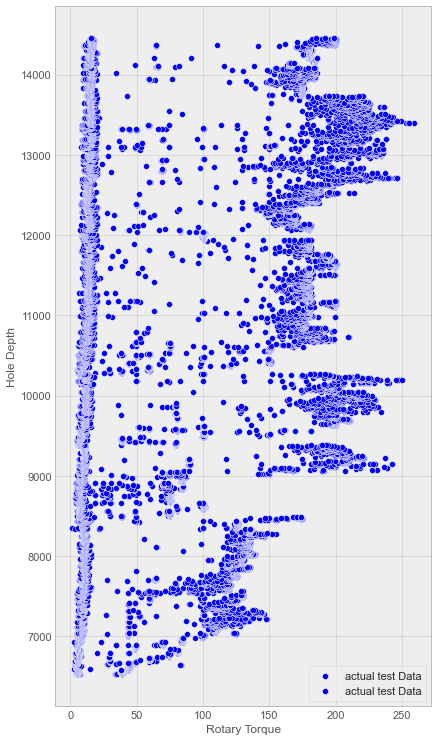

In [42]:
#plt.gca().invert_yaxis()

plt.figure(figsize=(6,12))
sns.scatterplot(y, data['Hole Depth'],
label='actual test Data', color='blue')
sns.scatterplot(data["Rotary Torque"], data['Hole Depth'],
label='actual test Data', color='blue')